# Análisis de un Marco Plano con el Método de Elementos Finitos (MEF)
 
Este notebook demuestra cómo analizar un marco o pórtico plano utilizando el MEF. El elemento de marco es el más general para estructuras 2D, ya que combina el comportamiento axial (como una barra de armadura) y el de flexión (como una viga).

Características clave del elemento de marco:
- Cada nodo tiene **tres grados de libertad**: desplazamiento horizontal ('x'), desplazamiento vertical ('y') y rotación o giro ('eje_z').
- La matriz de rigidez de cada elemento es de 6x6 y se obtiene superponiendo las matrices de rigidez de un elemento de armadura y un elemento de viga, transformadas al sistema de coordenadas global.


**Problema:**
 
El siguiente ejemplo, basado en el libro *A First Course in the Finite Element Method* de Daryl L. Logan, analiza el marco plano mostrado a continuación. Se busca determinar los desplazamientos y giros nodales, las reacciones en los apoyos y los diagramas de esfuerzos para toda la estructura.

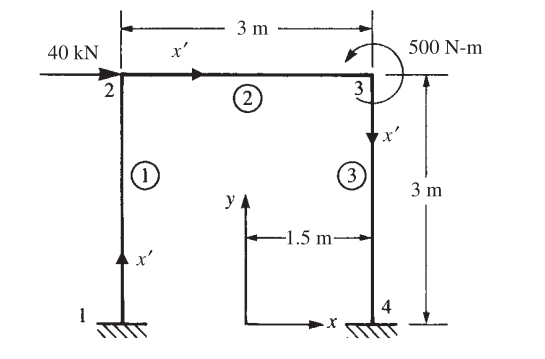

In [1]:
from mnspy import Nodo, Marco, Ensamble

### Paso 1: Definición de los Nodos (Pre-procesamiento)
Se crean los nodos del sistema, especificando sus coordenadas (x, y) y sus condiciones de frontera para los tres grados de libertad.
- `{'x': False, 'y': False, 'eje_z': False}`: Apoyo empotrado (restringe todos los movimientos).
- `{'x': True, 'y': True, 'eje_z': True}`: Nodo libre (unión rígida). 

In [2]:
n_1= Nodo('1', 0, 0, grados_libertad={'x': False, 'y': False, 'eje_z': False})
n_2= Nodo('2', 0, 3, grados_libertad={'x': True, 'y': True, 'eje_z': True})
n_3= Nodo('3', 3, 3, grados_libertad={'x': True, 'y': True, 'eje_z': True})
n_4= Nodo('4', 3, 0, grados_libertad={'x': False, 'y': False, 'eje_z': False})

### Paso 2: Definición de los Elementos (Marcos)

Se crean los elementos tipo `Marco`, especificando su ID, los nodos que conecta, y sus propiedades: Área (`A`), Módulo de Young (`E`) y Momento de Inercia (`I`).

In [3]:
e_1 = Marco('1', n_1, n_2, A= 6500E-6, E=200E9, I=80E-6 )
e_2 = Marco('2', n_2, n_3, A= 6500E-6, E=200E9, I=40E-6 )
e_3 = Marco('3', n_3, n_4, A= 6500E-6, E=200E9, I=80E-6 )

### Paso 3: Aplicación de Cargas Externas

Se aplican las cargas externas en los nodos correspondientes. Una fuerza se aplica en una dirección ('x' o 'y'), y un momento se aplica sobre el 'eje_z'.

In [4]:
n_2.agregar_fuerza_externa(40000,'x')
n_3.agregar_fuerza_externa(500,'eje_z')

### Paso 4: Matrices de Rigidez de los Elementos

Cada elemento `Marco` tiene una matriz de rigidez de 6x6 en el sistema de coordenadas global.

In [5]:
e_1

Marco: 1

In [6]:
e_2

Marco: 2

In [7]:
e_3

Marco: 3

### Paso 5: Ensamble del Sistema

Se crea un objeto `Ensamble` que agrupa todos los elementos y se visualiza el problema.

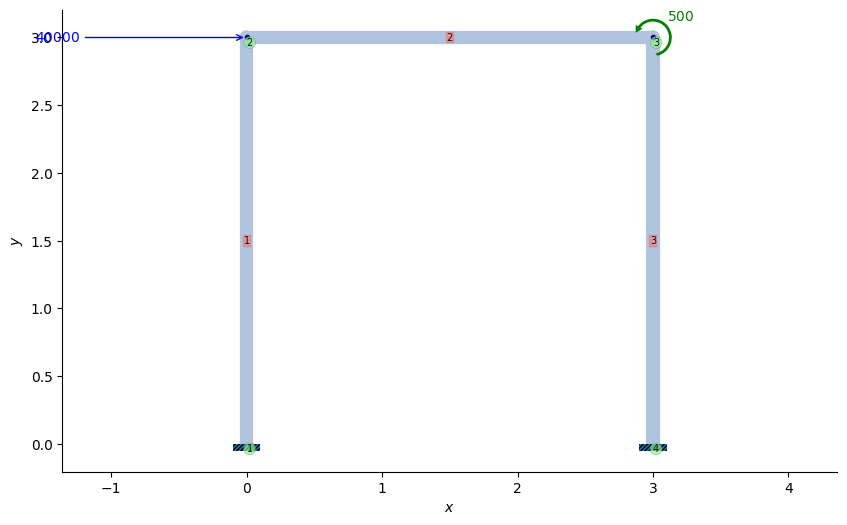

In [8]:
mg = Ensamble([e_1, e_2, e_3])
mg.diagrama_cargas()

### Paso 6: Matriz de Rigidez Global y Reducida

El ensamble construye la matriz de rigidez global del sistema completo. Luego, se extrae la matriz reducida que corresponde únicamente a los grados de libertad desconocidos.

In [9]:
print("--- Matriz de Rigidez Global ---")
mg

--- Matriz de Rigidez Global ---


In [10]:
print("\n--- Matriz de Rigidez Global Reducida ---")
mg.matriz_global_reducida()


--- Matriz de Rigidez Global Reducida ---


<IPython.core.display.Math object>

### Paso 7: Solución del Sistema (Procesamiento)

Se resuelve el sistema `[K]{u} = {F}` para encontrar los desplazamientos y giros desconocidos, y luego se calculan las fuerzas y momentos de reacción.

In [11]:
mg.solucionar_por_gauss_y_calcular_reacciones()
# El método `solucion()` muestra los desplazamientos y giros calculados.
mg.solucion()

Desplazamientos,Reacciones
$u_{1}=0$,$\color{blue}F_{1x}=-19965.75342$
$v_{1}=0$,$\color{blue}F_{1y}=-14814.2237$
$\phi_{1}=0$,$\color{blue}M_{1}=37576.60966$
$\color{blue}u_{2}=0.004953053316$,$\cancel{F_{2x}}$
$\color{blue}v_{2}=3.418667007 \times 10^{-5}$,$\cancel{F_{2y}}$
$\color{blue}\phi_{2}=-0.00143024616$,$\cancel{M_{2}}$
$\color{blue}u_{3}=0.004906820439$,$\cancel{F_{3x}}$
$\color{blue}v_{3}=-3.418667007 \times 10^{-5}$,$\cancel{F_{3y}}$
$\color{blue}\phi_{3}=-0.00139300301$,$\cancel{M_{3}}$
$u_{4}=0$,$\color{blue}F_{4x}=-20034.24658$


In [12]:
# Al mostrar el objeto `Ensamble` de nuevo, se puede ver el estado completo del sistema, incluyendo los resultados.
mg

### Paso 8: Post-procesamiento
 
Una vez resuelto el sistema, se pueden obtener los resultados de ingeniería más importantes: los diagramas de esfuerzos y la deformada.

#### 8.1 Resultados Globales de la Estructura

El objeto `Ensamble` puede generar los diagramas para toda la estructura del marco.

--- Diagrama de Fuerza Axial (N) ---


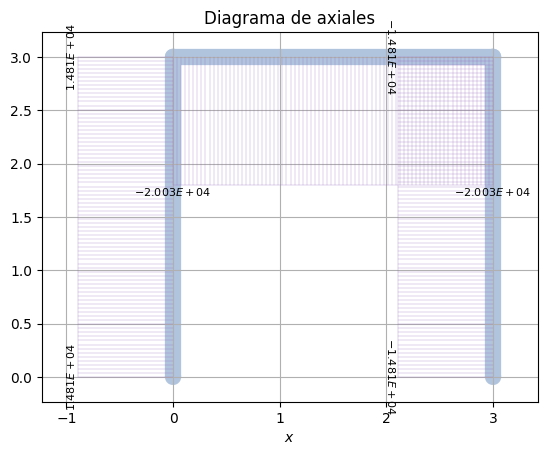

In [13]:
print("--- Diagrama de Fuerza Axial (N) ---")
mg.diagrama_de_axial()

--- Diagrama de Fuerza Cortante (V) ---


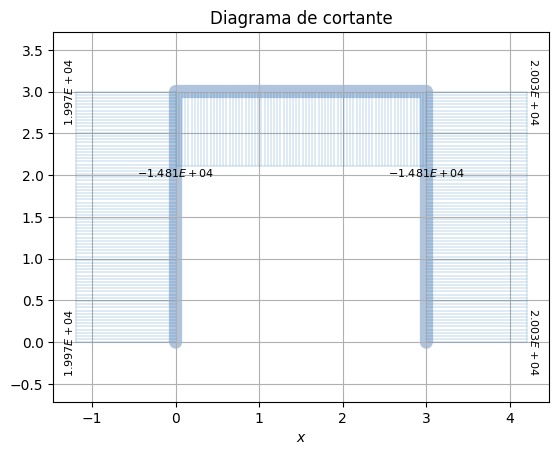

In [14]:
print("--- Diagrama de Fuerza Cortante (V) ---")
mg.diagrama_de_cortante()

--- Diagrama de Momento Flector (M) ---


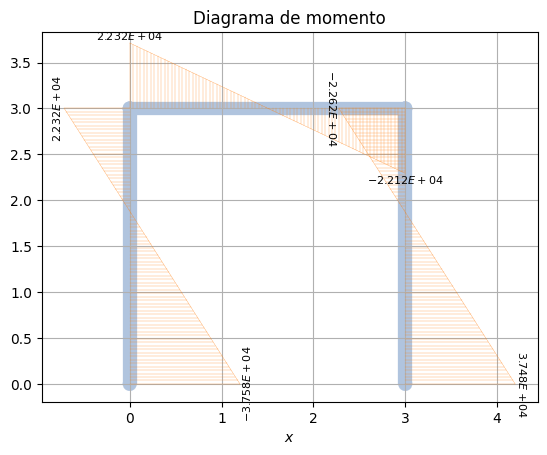

In [15]:
print("--- Diagrama de Momento Flector (M) ---")
mg.diagrama_de_momento()

--- Diagrama de Giro (θ) ---


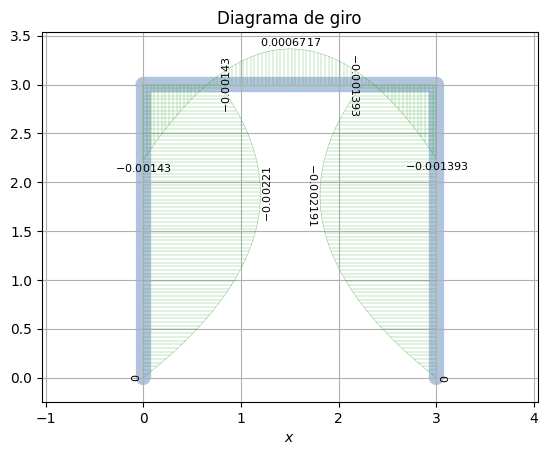

In [16]:
print("--- Diagrama de Giro (θ) ---")
mg.diagrama_de_giro()

--- Diagrama de Deflexión (y) ---


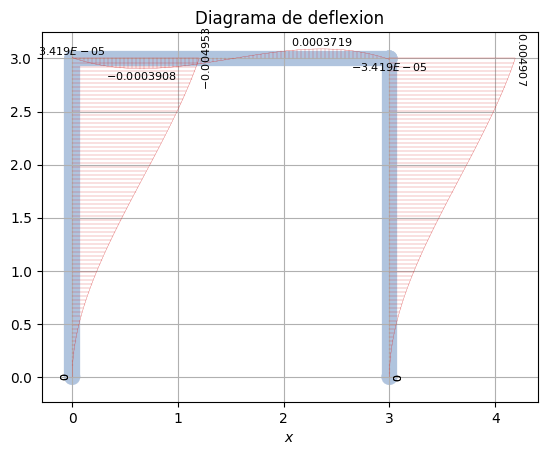

In [17]:
print("--- Diagrama de Deflexión (y) ---")
mg.diagrama_de_deflexion()

#### 8.2 Visualización de la Deformada
 
Se puede graficar la forma deformada de la estructura. Los desplazamientos reales suelen ser muy pequeños, por lo que se amplifican con un `factor de magnificación` para que la deformación sea visible.

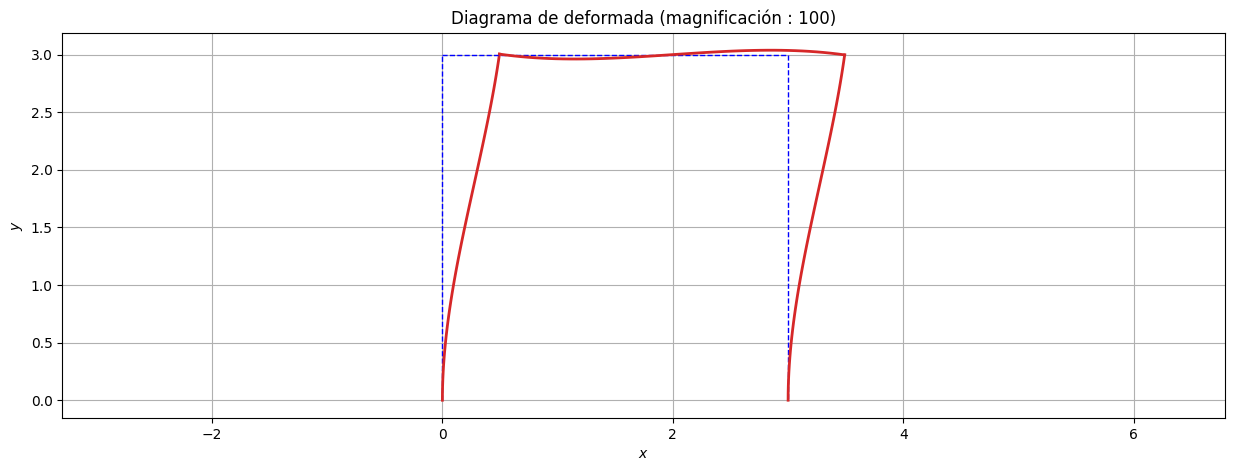

In [18]:
mg.deformada(magnificacion=100)

#### 8.3 Análisis Detallado por Elemento (Ejemplo: Elemento 1)

Para el diseño detallado, es útil inspeccionar las fuerzas y diagramas de un elemento individual.

**Fuerzas Locales vs. Globales:**
- **Globales**: Componentes de fuerza y momento en los ejes X-Y globales.
- **Locales**: Componentes de fuerza y momento en los ejes propios del elemento (fuerza axial, fuerza cortante).

In [19]:
print("--- Fuerzas Internas Nodales (Elemento 1) ---")
print("Fuerzas en coordenadas GLOBALES:")
e_1.fuerzas_internas()

--- Fuerzas Internas Nodales (Elemento 1) ---
Fuerzas en coordenadas GLOBALES:


,Fuerzas internas
$f^{(1)}_{1x}$,-19965.8
$f^{(1)}_{1y}$,-14814.2
$m^{(1)}_{1}$,37576.6
$f^{(1)}_{2x}$,19965.8
$f^{(1)}_{2y}$,14814.2
$m^{(1)}_{2}$,22320.7


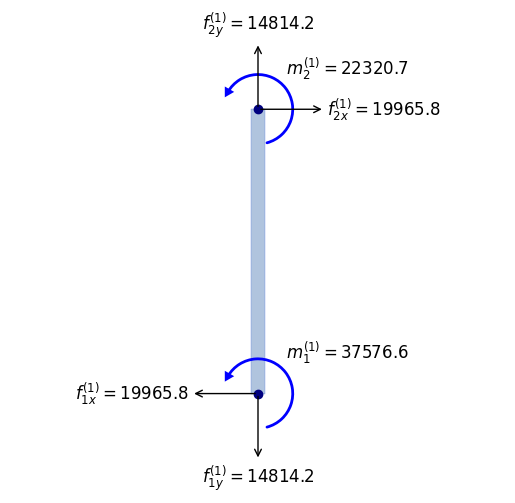

In [20]:
e_1.diagrama_fuerzas_internas()

In [21]:
print("Fuerzas en coordenadas LOCALES (Axial y Cortante):")
e_1.fuerzas_internas_local()

Fuerzas en coordenadas LOCALES (Axial y Cortante):


,Fuerzas internas local
$f^{\prime(1)}_{1x}$,-14814.2
$f^{\prime(1)}_{1y}$,19965.8
$m^{\prime(1)}_{1}$,37576.6
$f^{\prime(1)}_{2x}$,14814.2
$f^{\prime(1)}_{2y}$,-19965.8
$m^{\prime(1)}_{2}$,22320.7


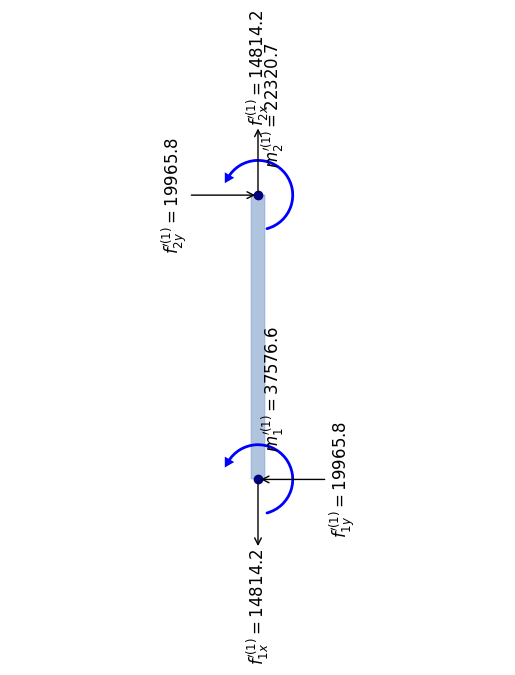

In [22]:
e_1.diagrama_fuerzas_internas_local()

--- Diagramas de Esfuerzos (Elemento 1) ---
Diagrama de Cortante (Coordenadas Locales):


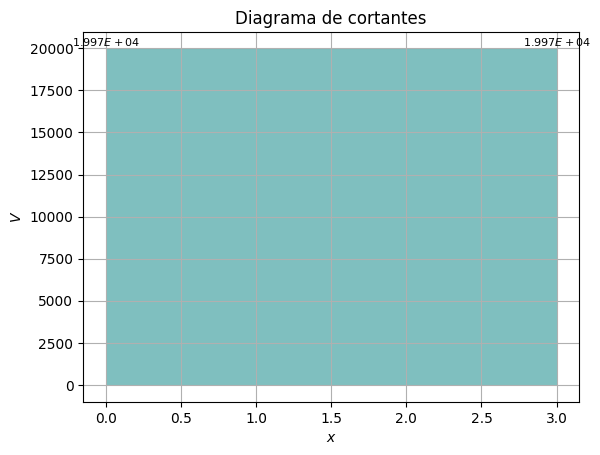

In [23]:
print("--- Diagramas de Esfuerzos (Elemento 1) ---")
print("Diagrama de Cortante (Coordenadas Locales):")
e_1.diagrama_de_cortante(local=True)

Diagrama de Momento (Coordenadas Locales):


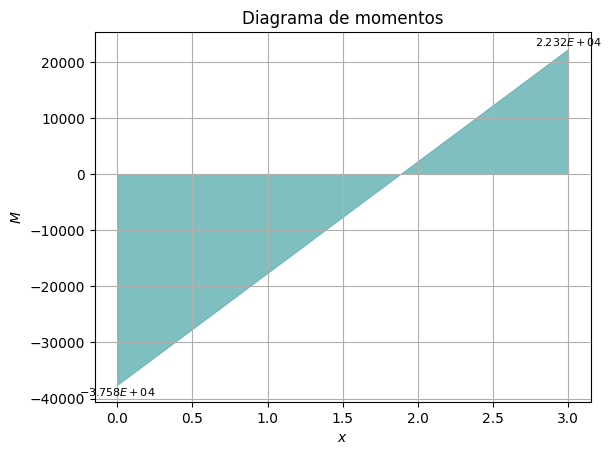

In [24]:
print("Diagrama de Momento (Coordenadas Locales):")
e_1.diagrama_de_momento(local=True)

--- Ecuaciones Internas (Elemento 1) ---
Ecuación de Cortante V(x):


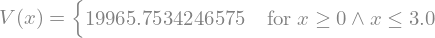

In [25]:
print("--- Ecuaciones Internas (Elemento 1) ---")
print("Ecuación de Cortante V(x):")
e_1.ecuacion_de_cortante()